### Задание 1. A/B–тестирование
#### 1.1 Условие

Одной из основных задач аналитика в нашей команде является корректное проведение экспериментов. Для этого мы применяем метод A/B–тестирования. В ходе тестирования одной гипотезы целевой группе была предложена новая механика оплаты услуг на сайте, у контрольной группы оставалась базовая механика. В качестве задания Вам необходимо проанализировать итоги эксперимента и сделать вывод, стоит ли запускать новую механику оплаты на всех пользователей.

#### 1.2 Входные данные

В качестве входных данных Вы имеете 4 csv-файла:
- `groups.csv` - файл с информацией о принадлежности пользователя к контрольной или экспериментальной группе (А – контроль, B – целевая группа) 
- `groups_add.csv` - дополнительный файл с пользователями, который вам прислали спустя 2 дня после передачи данных
- `active_studs.csv` - файл с информацией о пользователях, которые зашли на платформу в дни проведения эксперимента. 
- `checks.csv` - файл с информацией об оплатах пользователей в дни проведения эксперимента. 

#### 1.3 Вопросы

Предлагаем Вам ответить на следующие вопросы:

- На какие метрики Вы смотрите в ходе анализа и почему?
- Имеются ли различия в показателях и с чем они могут быть связаны?
- Являются ли эти различия статистически значимыми?
- Стоит ли запускать новую механику на всех пользователей?
- Данный список вопросов не является обязательным, и Вы можете при своём ответе опираться на собственный план.

#### 1.4 Требования к ответу

При выполнении тестового задания необходимо использовать язык программирования Python. 
В файле обязательно должны быть комментарии к тем действиям, которые Вы выполняете с данными. 
Файл должен представлять собой законченный отчёт с выводами, сделанными в ходе исследования.

### Задание 2. SQL
#### 2.1 Очень усердные ученики.

#### 2.1.1 Условие

Образовательные курсы состоят из различных уроков, каждый из которых состоит из нескольких маленьких заданий. Каждое такое маленькое задание называется "горошиной". Назовём очень усердным учеником того пользователя, который хотя бы раз за текущий месяц правильно решил 20 горошин.

#### 2.1.2 Задача

Дана таблица `default.peas`:

| Название атрибута | Тип атрибута | Смысловое значение                         |
|-------------------|--------------|--------------------------------------------|
| st_id             | int          | ID ученика                                 |
| timest            | timestamp    | Время решения карточки                     |
| correct           | bool         | Правильно ли решена горошина?              |
| subject           | text         | Дисциплина, в которой находится горошина   |



Необходимо написать __оптимальный запрос__, который даст информацию о количестве очень усердных студентов. NB! Под усердным студентом мы понимаем студента, который `правильно` решил 20 задач за текущий месяц.

#### 2.2 Оптимизация воронки

#### 2.2.1 Условие

Образовательная платформа предлагает пройти студентам курсы по модели trial: студент может решить бесплатно лишь 30 горошин в день. Для неограниченного количества заданий в определенной дисциплине студенту необходимо приобрести полный доступ. Команда провела эксперимент, где был протестирован новый экран оплаты.

#### 2.2.2 Задача

Дана таблицы: `default.peas` (см. выше), `default.studs`:

| Название атрибута | Тип атрибута | Смысловое значение                         |
|-------------------|--------------|--------------------------------------------|
| st_id             | int          | ID ученика                                 |
| test_grp          | text         | Метка ученика в данном эксперименте        |



и `default.final_project_check`:

| Название атрибута | Тип атрибута | Смысловое значение                         |
|-------------------|--------------|--------------------------------------------|
| st_id             | int          | ID ученика                                 |
| sale_time         | timestamp    | Время покупки                              |
| money             | int          | Цена, по которой приобрели данный курс     |
| subject           | text         |                                            |
	
Необходимо __в одном запросе__ выгрузить следующую информацию о группах пользователей:

- ARPU 
- ARPAU 
- CR в покупку 
- СR активного пользователя в покупку 
- CR пользователя из активности по математике (subject = ’math’) в покупку курса по математике
- ARPU считается относительно всех пользователей, попавших в группы.

`Активным` считается пользователь, за все время решивший `больше 10 задач` правильно в любых дисциплинах.

`Активным по математике` считается пользователь, за все время решивший `2 или больше задач` правильно по математике.

__Все данные находятся в табличном виде в ClickHouse__
### Задание 3. Python
#### 3.1 Задача

1. Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного файла groups_add.csv (заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики.
2. Реализуйте функцию, которая будет строить графики по получаемым метрикам.

---

## EDA (exploratory data analysis)

---

>Импортируем нужные нам библиотеки.

In [2]:
import pandas as pd
import numpy as np

import pandahouse as ph

import requests
from urllib.parse import urlencode

import numpy as np
from tqdm.auto import tqdm

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

>Выгружаем данные.

In [3]:
df_groups = pd.read_csv('groups.csv', sep=';')
df_groups_add = pd.read_csv('group_add.csv', sep=',')
df_active_studs = pd.read_csv('active_studs.csv', sep=';')
df_checks = pd.read_csv('checks.csv', sep=';')

>Выведем информацию о кол-ве строк в каждом датафреме, пригодится  при дальнешем мердеже чтобы проверить  не потеряли ли мы данные.

In [4]:
print('Кол-во строк в файлах: \
    \ndf_groups {} \
    \ndf_groups_add {} \
    \ndf_active_studs {} \
    \ndf_checks {}'.format(df_groups.shape[0], df_groups_add.shape[0], df_active_studs.shape[0], df_checks.shape[0]))

Кол-во строк в файлах:     
df_groups 74484     
df_groups_add 92     
df_active_studs 8341     
df_checks 541


>Проверим все 4 датафрема на наличие пропущенных значений, перед их объеденением. isna переведет все значения в False или True, а sum посчитаем сумму по каждому столбцы (т.к. True = 1, a False = 0, на выходе мы получим корректную информацию).

In [97]:
df_groups.isna().sum()

id     0
grp    0
dtype: int64

In [98]:
df_groups_add.isna().sum()

id     0
grp    0
dtype: int64

In [99]:
df_active_studs.isna().sum()

student_id    0
dtype: int64

In [100]:
df_checks.isna().sum()

student_id    0
rev           0
dtype: int64

>Для начала соеденим файл что нам дали изначало с тем что дослали через два дня.

In [7]:
df_all_groups = pd.concat([df_groups, df_groups_add])
df_all_groups.head()

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A


>Проверим, не потеряли ли мы строки.С помощью if/else. Если кол-во строк в получившимся датафреме совпадает с суммой строк в двух изначальных, то все хорошо.

In [8]:
if (df_all_groups.shape[0] == df_groups.shape[0] + df_groups_add.shape[0]) == True:
    print ('Good')
else:
    print('Wrong')

Good


>Теперь объеденяем датафрем с id активных пользователей в период эксперимента с датарфемом содержащим обозначение групп пользователей, использвуем inner merge чтобы оставить только интересущих нас пользователей. После к этому датафрему присоеденим датафрем с оплатами пользователйе, только использоуем уже left merge, а занчение NaN в ячейки даст нам знать что пользователь не совершал покупку.

In [9]:
df = pd.merge(df_active_studs, df_all_groups, left_on='student_id', right_on='id') \
    .merge(df_checks, on='student_id', how='left')
#первый раз используем inner merge, он задан по умолчанию
#во второй раз воспользуемся left merge, т.к. не для всех id есть оплата
df.head()

,student_id,id,grp,rev
0,581585,581585,A,NaN
1,5723133,5723133,A,NaN
2,3276743,3276743,B,NaN
3,4238589,4238589,A,NaN
4,4475369,4475369,B,NaN


>Проверим, что получившийся датафрем имеет одинаковое кол-во строк с тем что нам выслали в файле active_studs.С помощью if/else. Если кол-во строк в получившимся датафреме совпадает, то получим сообщение что все хорошо.

In [10]:
if (df.shape[0] == df_active_studs.shape[0]) == True:
    print ('Good')
else:
    print('Wrong')

Good


>Заменим NaN на 0, для наглядности и удобства подсчетов и так как столбцы student_id и id полностью дублируют друг друга, уберем один из них в датафрейме с которым будем работать в дальнешим.

In [11]:
df['rev'] = df['rev'].fillna(0) #заменяем все NaN на 0
df = df[['student_id', 'grp', 'rev']] #оставляем только выбранные нами столбцы
#на выходе получаем датафрем с которым и будем работать в дальнейшем
df

,student_id,grp,rev
0,581585,A,0.0
1,5723133,A,0.0
2,3276743,B,0.0
3,4238589,A,0.0
4,4475369,B,0.0
...,...,...,...
8336,1794344,B,0.0
8337,296883,B,0.0
8338,3598448,B,0.0
8339,3610547,B,290.0


---
### Задание 1. A/B–тестирование
#### 1.1 Условие

Одной из основных задач аналитика в нашей команде является корректное проведение экспериментов. Для этого мы применяем метод A/B–тестирования. В ходе тестирования одной гипотезы целевой группе была предложена новая механика оплаты услуг на сайте, у контрольной группы оставалась базовая механика. В качестве задания Вам необходимо проанализировать итоги эксперимента и сделать вывод, стоит ли запускать новую механику оплаты на всех пользователей.

#### 1.2 Входные данные

В качестве входных данных Вы имеете 4 csv-файла:
- `groups.csv` - файл с информацией о принадлежности пользователя к контрольной или экспериментальной группе (А – контроль, B – целевая группа) 
- `groups_add.csv` - дополнительный файл с пользователями, который вам прислали спустя 2 дня после передачи данных
- `active_studs.csv` - файл с информацией о пользователях, которые зашли на платформу в дни проведения эксперимента. 
- `checks.csv` - файл с информацией об оплатах пользователей в дни проведения эксперимента. 

#### 1.3 Вопросы

Предлагаем Вам ответить на следующие вопросы:

- На какие метрики Вы смотрите в ходе анализа и почему?
- Имеются ли различия в показателях и с чем они могут быть связаны?
- Являются ли эти различия статистически значимыми?
- Стоит ли запускать новую механику на всех пользователей?
- Данный список вопросов не является обязательным, и Вы можете при своём ответе опираться на собственный план.

#### 1.4 Требования к ответу

При выполнении тестового задания необходимо использовать язык программирования Python. 
В файле обязательно должны быть комментарии к тем действиям, которые Вы выполняете с данными. 
Файл должен представлять собой законченный отчёт с выводами, сделанными в ходе исследования.

---

>В нашем случай считаю оптимальным выбрать для анализа следующие метркии:
1. CR (Конверсия) - покажет отношения клиентов к пользователям
2. ARPUU - покажет средний доход на клиента
3. ARPU - покажет средний доход с привлечённого пользователя

>Так мы увидим кол-во пользователей на всех этапах наших воронок + сможем посмотреть на на реальный доход от каждого пользователя.

>Расчет метрик будем проводить по следующим формулам:
1. CR = кол-во клиентов / кол-во пользователей
2. ARPPU = суммарный доход / кол-во клиентов
3. ARPU = CR * ARPPU

In [12]:
number_users_a = df.query('grp == "A"').student_id.count() #кол-во пользователей в группе А
number_users_b = df.query('grp == "B"').student_id.count() #кол-во пользователей в группе B
number_clients_a = df.query('grp == "A" and rev > 0').student_id.count() #кол-во клиентов (т.е. пользователи которые заплатили) в группе А
number_clients_b = df.query('grp == "B" and rev > 0').student_id.count() #кол-во клиентов (т.е. пользователи которые заплатили) в группе B
conversion_a = number_clients_a / number_users_a #CR в группе A
conversion_b = number_clients_b / number_users_b #CR в группе B
revenue_a = df.query('grp == "A"').rev.sum() #суммарный доход в группу A
revenue_b = df.query('grp == "B"').rev.sum() #суммарный доход в группу B
arppu_a = revenue_a/number_clients_a #ARPPU в группе A
arppu_b = revenue_b/number_clients_b #ARPPU в группе B
arpu_a = conversion_a * arppu_a #ARPU в группе A
arpu_b = conversion_b * arppu_b #ARPU в группе B



print('Кол-во пользователей в группe А: {} \
    \nКол-во пользователей в группe B: {} \
    \nКол-во клиентов в группe A: {} \
    \nКол-во клиентов в группe B: {} \
    \nКонверсия в клиента в группе А: {} \
    \nКонверсия в клиента в группе B: {} \
    \nДоход группы А: {} \
    \nДоход группы B: {} \
    \nARPPU группы A: {} \
    \nARPPU группы B: {} \
    \nARPU группы А: {} \
    \nARPU группы B: {}'
    .format(number_users_a, number_users_b, number_clients_a, number_clients_b, conversion_a, conversion_b, revenue_a, revenue_b, arppu_a, arppu_b, arpu_a, arpu_b))

Кол-во пользователей в группe А: 1538     
Кол-во пользователей в группe B: 6803     
Кол-во клиентов в группe A: 78     
Кол-во клиентов в группe B: 314     
Конверсия в клиента в группе А: 0.05071521456436931     
Конверсия в клиента в группе B: 0.046156107599588415     
Доход группы А: 72820.0     
Доход группы B: 394974.0035     
ARPPU группы A: 933.5897435897435     
ARPPU группы B: 1257.8789920382164     
ARPU группы А: 47.34720416124837     
ARPU группы B: 58.05879810377774


>Теперь посмотрим как отличаются метрики в двух группах:

In [13]:
round(conversion_b / conversion_a * 100, 2)

91.01

In [14]:
round(arppu_b / arppu_a * 100, 2)

134.74

In [15]:
round(arpu_b / arpu_a * 100, 2)

122.62

>Видим что по полученным данных `CR (конверсия) упала почти на 9%`, однако `ARPPU и ARPU увеличились почти на 35 и 23%` соответственно. Т.е. в группе B ользователи стали реже совершать целевое действие (покупку), однако средний чек тех кто это делает значительно увеличился.

>Теперь применим статистику чтобы понять являются ли эти различия значимыми. Для начала сравним размеры групп и построим график по покупкам пользователей.

In [16]:
df.groupby('grp', as_index=False).agg({'student_id': 'count'})

,grp,student_id
0,A,1538
1,B,6803


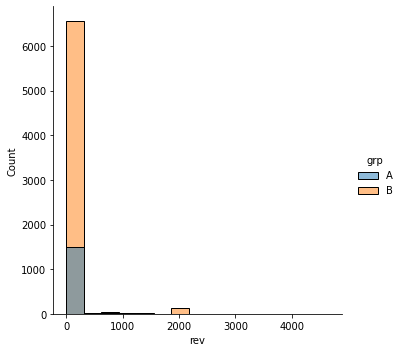

In [17]:
sns.displot(data=df, x='rev', hue='grp') #по всем значения (включая нули)

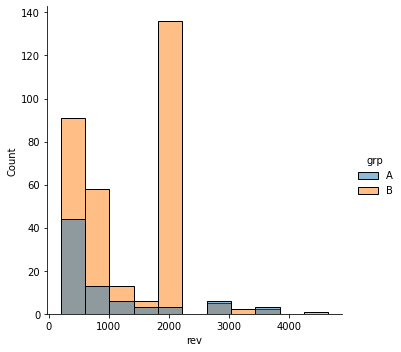

In [18]:
sns.displot(data=df.query('rev > 0'), x='rev', hue='grp') #только среди клиентов (т.е. rev>0)

>Как видим размеры групп А и В большие, но при этом очень сильно отличаются между собой, к томуу же распределения явно ненормальные. Следовательно т-тест и тест Манна-Уитни могут быть неточными, в таком случае лучше воспользуемся бутстрапом, т.е. мы не будем считать стат.значимость на основе теоретических показателей, а положимся только на данные эксперимента.

>Для этой проверки напишем функцию.

In [19]:
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 10000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
    ):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, # чтобы сохранить дисперсию, берем такой же размер выборки
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) 
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if abs(bar.get_x()) <= quants.iloc[0][0] or abs(bar.get_x()) >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=500,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"quants": quants, 
            "p_value": p_value}

plt.style.use('ggplot')

>Для метрики CR, требуется добавить еще один столбец, с информацией о том является ли пользователь клиентом (т.е. совершал ли он оплату).

In [20]:
df['client'] = df.rev.apply(lambda x: 1 if x > 0 else 0) # 1 - клиент, 0 - пользователь
df.head()

,student_id,grp,rev,client
0,581585,A,0.0,0
1,5723133,A,0.0,0
2,3276743,B,0.0,0
3,4238589,A,0.0,0
4,4475369,B,0.0,0


>Создаем датафрейм для каждой группы, значения которых и будем подставлять в нашу фукнцию.

In [21]:
df_a = df.query('grp == "A"')
df_b = df.query('grp == "B"')

>Теперь применим нашу функцию для нахождения стат.значимых отличий между группами по трем метрикам. Если получившийся доверительный (95%) интервал попадает в ноль, что будем делать вывод о применение нулевой гипотезы (равенство метрик), в противном случае, отвергаем нулевую гипотезу принимаем что мы обнаружили стат.значимые отличия.

>CR (конверсия)

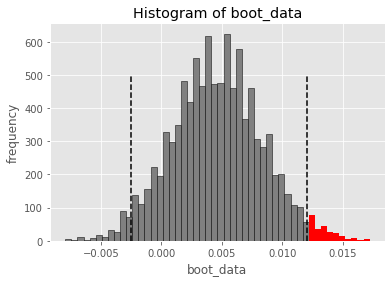

{'quants':               0
 0.025 -0.002499
 0.975  0.012054,
 'p_value': 0.21623705727271214}

In [22]:
get_bootstrap(
    df_a.client, # числовые значения первой выборки
    df_b.client, # числовые значения второй выборки
    boot_it = 10000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
)

>ARPU

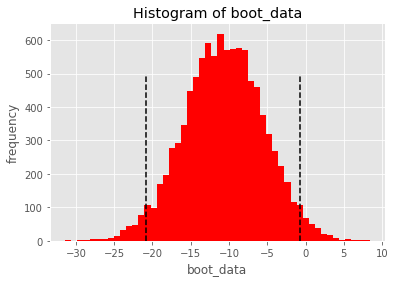

{'quants':                0
 0.025 -20.906347
 0.975  -0.703506,
 'p_value': 0.038488403742479645}

In [23]:
get_bootstrap(
    df_a.rev, # числовые значения первой выборки
    df_b.rev, # числовые значения второй выборки
    boot_it = 10000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
)

>ARPPU (оставим только клиентов, т.е. исключим нули)

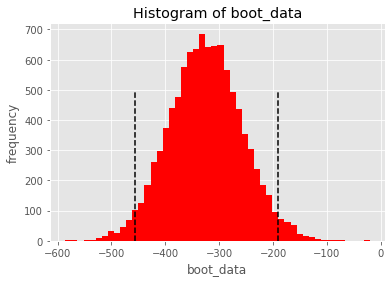

{'quants':                0
 0.025 -456.50654
 0.975 -189.95622,
 'p_value': 1.5235131921537592e-06}

In [24]:
get_bootstrap(
    df_a.query('rev>0').rev, # числовые значения первой выборки
    df_b.query('rev>0').rev, # числовые значения второй выборки
    boot_it = 10000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
)

>По результатам бутстрапа можно сказать что ранее обнаруженный нами рост метрик ARPPU и ARPU является статистически значимым, т.е. мы отвергаем нулевую гипотезу о равенстве этих метрик в двух группах. Что касается метрики CR которая показала падение относительно группы А, то по результату проверки отличий найдено не было, т.е. мы оставляем нулевую теорию и говорим что между этими метриками нет стат.значимых отличий.

>Обновление стоит выкатывать на всех пользователей.

---
### Задание 2. SQL
#### 2.1 Очень усердные ученики.

#### 2.1.1 Условие

Образовательные курсы состоят из различных уроков, каждый из которых состоит из нескольких маленьких заданий. Каждое такое маленькое задание называется "горошиной". Назовём очень усердным учеником того пользователя, который хотя бы раз за текущий месяц правильно решил 20 горошин.

#### 2.1.2 Задача

Дана таблица `default.peas`:

| Название атрибута | Тип атрибута | Смысловое значение                         |
|-------------------|--------------|--------------------------------------------|
| st_id             | int          | ID ученика                                 |
| timest            | timestamp    | Время решения карточки                     |
| correct           | bool         | Правильно ли решена горошина?              |
| subject           | text         | Дисциплина, в которой находится горошина   |



Необходимо написать __оптимальный запрос__, который даст информацию о количестве очень усердных студентов. NB! Под усердным студентом мы понимаем студента, который `правильно` решил 20 задач за текущий месяц.

---

In [25]:
#создаем словарь для подключения к default, где и лежат нужные нам таблицы
connection_default = {'host': 'http://clickhouse.beslan.pro:8080',
                      'database':'default',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

In [26]:
#создаем запрос
q = '''
    SELECT
        COUNT(*) as count_hard_student --теперь считаем общее кол-во таких студентов
    FROM                               --воспользуемся подзапросом
        (
        SELECT 
           st_id
        FROM 
            {db}.peas
        WHERE
            correct == 1               --оставим только строки с правильно решенными задачами
        GROUP BY
            st_id
        HAVING
            COUNT(correct) >= 20       --после гурпировки оставим только строки с кол-ом правильных решений больше 20
        )
    
    '''

# отправляем запрос и записываем результат в пандасовский датафрейм
q_count_hard_student = ph.read_clickhouse(query=q, connection=connection_default)
q_count_hard_student

,count_hard_student
0,136


---
#### 2.2 Оптимизация воронки

#### 2.2.1 Условие

Образовательная платформа предлагает пройти студентам курсы по модели trial: студент может решить бесплатно лишь 30 горошин в день. Для неограниченного количества заданий в определенной дисциплине студенту необходимо приобрести полный доступ. Команда провела эксперимент, где был протестирован новый экран оплаты.

#### 2.2.2 Задача

Дана таблицы: `default.peas` (см. выше), `default.studs`:

| Название атрибута | Тип атрибута | Смысловое значение                         |
|-------------------|--------------|--------------------------------------------|
| st_id             | int          | ID ученика                                 |
| test_grp          | text         | Метка ученика в данном эксперименте        |



и `default.final_project_check`:

| Название атрибута | Тип атрибута | Смысловое значение                         |
|-------------------|--------------|--------------------------------------------|
| st_id             | int          | ID ученика                                 |
| sale_time         | timestamp    | Время покупки                              |
| money             | int          | Цена, по которой приобрели данный курс     |
| subject           | text         |                                            |
	
Необходимо __в одном запросе__ выгрузить следующую информацию о группах пользователей:

- ARPU 
- ARPAU 
- CR в покупку 
- СR активного пользователя в покупку 
- CR пользователя из активности по математике (subject = ’math’) в покупку курса по математике

ARPU считается относительно всех пользователей, попавших в группы.

`Активным` считается пользователь, за все время решивший `больше 10 задач` правильно в любых дисциплинах.

`Активным по математике` считается пользователь, за все время решивший `2 или больше задач` правильно по математике.

__Все данные находятся в табличном виде в ClickHouse__

---

In [77]:
q = '''
    SELECT
        test_grp,
        SUM (money) / COUNT (DISTINCT st_id) AS ARPU,
        SUM (CASE WHEN sum_correct>10 THEN money END) / COUNT (DISTINCT CASE WHEN sum_correct>10 THEN st_id END) AS ARPAU,
        COUNT (DISTINCT fpc.st_id) / COUNT (DISTINCT A.st_id) AS CR_to_client,
        COUNT (DISTINCT CASE WHEN sum_correct>10 AND money>0 THEN fpc.st_id END) / COUNT (DISTINCT CASE WHEN sum_correct>10 THEN A.st_id END) AS CR_ative_users_to_client,
        COUNT (DISTINCT CASE WHEN fpc.subject='Math' AND sum_correct_math>=2 THEN fpc.st_id END) / COUNT (DISTINCT CASE WHEN sum_correct_math>=2 THEN A.st_id END) AS CR_active_math
    FROM(
        SELECT
            st_id,
            test_grp,
            SUM (correct) AS sum_correct,
            SUM (CASE WHEN p.subject='Math' THEN correct END) AS sum_correct_math
        FROM {db}.studs AS s
        LEFT JOIN
            {db}.peas AS p ON s.st_id=p.st_id
        GROUP BY st_id, test_grp
        ) AS A
    LEFT JOIN
        {db}.final_project_check AS fpc ON A.st_id=fpc.st_id
    GROUP BY test_grp
    '''

q_final_2 = ph.read_clickhouse(query=q, connection=connection_default)
q_final_2

,test_grp,ARPU,ARPAU,CR_to_client,CR_ative_users_to_client,CR_active_math
0,control,4540.983607,10393.700787,0.052459,0.110236,0.061224
1,pilot,11508.474576,29739.583333,0.111864,0.260417,0.095238


>Комментарии по блоку `SELECT`:

- __`ARPU`__ - средний платеж на всех зарегистрированных игроков
- `SUM (money)` - кол-во всех денег полученных от пользователей (клиентов)
- `COUNT (DISTINCT st_id)` - кол-во уникальных пользователей


- __`ARPAU`__ - средний платеж на всех активных пользователей
- `SUM (CASE WHEN sum_correct>10 THEN money END)` - кол-во денег, полученных от все активных пользователей (клиентов)
- `COUNT (DISTINCT CASE WHEN sum_correct>10 THEN st_id END)` - кол-во уникальных активных пользователей


- __`CR`__ - конверсия пользователя в клиента
- `COUNT (DISTINCT fpc.st_id)` - кол-во уникальных клиентов
- `COUNT (DISTINCT A.st_id)` - кол-во уникальных пользователей


- __`СR активного пользователя в покупку`__ - конверсия активного пользователя в клиента
- `COUNT (DISTINCT CASE WHEN sum_correct>10 AND money>0 THEN fpc.st_id END)` - кол-во уникальных активных клиентов
- `COUNT (DISTINCT CASE WHEN sum_correct>10 THEN A.st_id END)` - кол-во уникальных активных пользователей


- __`CR активного пользователя по математике в покупку курса по математике`__ - конверсия активного пользователя по математике в клиента по математике
- `COUNT (DISTINCT CASE WHEN fpc.subject='Math' AND sum_correct_math>=2 THEN fpc.st_id END)` - кол-во уникальных активных клиентов по математике
- `COUNT (DISTINCT CASE WHEN sum_correct_math>=2 THEN A.st_id END)` - кол-во уникальных активных пользователей по математике

>Комментарии по блокам `JOIN`:

- в двух случаях используем `LEFT JOIN`
- вначале к данным из `studs` (информация о группе пользователя) присоединяем значения из `peas` (кол-во правильно решенных заданий с группировкой по id пользователя)
- затем к получившийся таблице `А` добавляем значения из `final_project_check` (информация об оплатах пользователей)


---
### Задание 3. Python


#### 1. Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного файла groups_add.csv (заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики.

---

 >Для начала выведем все необходимые метрики без учета файла который нам выслали через 2 дня (groups_add.csv). Автоматизируем процесс который мы использовали в первом шаге и напишем функцию, которая будет принимать на вход три ссылки на данные и выдавать готовый датафрем с интересующими нас метриками.

In [21]:
def metrics(groups = 'groups.csv', active_studs = 'active_studs.csv', checks = 'checks.csv'):
    
    df_groups = pd.read_csv(groups, sep=';')
    df_active_studs = pd.read_csv(active_studs, sep=';')
    df_checks = pd.read_csv(checks, sep=';')
    
    df = df_active_studs.merge(df_groups, left_on = 'student_id', right_on = 'id', how = 'left')
    df = df.merge(df_checks, on = 'student_id', how = 'left')[['student_id', 'grp', 'rev']]
    
    number_users_a = df.query('grp == "A"').student_id.count()
    number_users_b = df.query('grp == "B"').student_id.count()
    number_clients_a = df.query('grp == "A" and rev > 0').student_id.count()
    number_clients_b = df.query('grp == "B" and rev > 0').student_id.count()
    conversion_a = number_clients_a / number_users_a
    conversion_b = number_clients_b / number_users_b
    revenue_a = df.query('grp == "A"').rev.sum()
    revenue_b = df.query('grp == "B"').rev.sum()
    arppu_a = revenue_a/number_clients_a
    arppu_b = revenue_b/number_clients_b
    arpu_a = conversion_a * arppu_a
    arpu_b = conversion_b * arppu_b

    all_info = pd.DataFrame({'group': ['A', 'B'],
                         'count_users': [number_users_a, number_users_b],
                         'count_clients': [number_clients_a, number_clients_b],
                         'CR_user_to_client': [conversion_a, conversion_b],
                         'revenue': [revenue_a, revenue_b],
                         'ARPPU': [arppu_a, arppu_b],
                         'ARPU': [arpu_a, arpu_b]
                        })
    
    return all_info

>Не указываем ссылки на наши данные, так как выше в функции мы задали значения по умолчанию, но в случае если ссылки изменяться, мы всегда сможем просто указать их вручную.

In [22]:
metrics()

,group,count_users,count_clients,CR_user_to_client,revenue,ARPPU,ARPU
0,A,1535,78,0.050814,72820.0000,933.589744,47.439739
1,B,6793,313,0.046077,393074.0035,1255.827487,57.864567


>Теперь напишим функцию которая будет принимать на вход тольколь один элемент, это таблица с доп.данным (groups_add.csv) и на выходе выдавать обновленные метрики с учетом новых данных, также зададим ссылку на новую таблицу в значения по умолчанию.

In [27]:
def metrics_add(groups_add = 'group_add.csv'):
    
    df_groups_ad = pd.read_csv(groups_add, sep=',')
    
    df_groups = pd.read_csv('groups.csv', sep=';')
    df_active_studs = pd.read_csv('active_studs.csv', sep=';')
    df_checks = pd.read_csv('checks.csv', sep=';') 
  
    df = pd.concat([df_groups, df_groups_ad])
    
    df = df_active_studs.merge(df, left_on = 'student_id', right_on = 'id', how = 'left')
    df = df.merge(df_checks, on = 'student_id', how = 'left')[['student_id', 'grp', 'rev']]
    
    number_users_a = df.query('grp == "A"').student_id.count()
    number_users_b = df.query('grp == "B"').student_id.count()
    number_clients_a = df.query('grp == "A" and rev > 0').student_id.count()
    number_clients_b = df.query('grp == "B" and rev > 0').student_id.count()
    conversion_a = number_clients_a / number_users_a
    conversion_b = number_clients_b / number_users_b
    revenue_a = df.query('grp == "A"').rev.sum()
    revenue_b = df.query('grp == "B"').rev.sum()
    arppu_a = revenue_a/number_clients_a
    arppu_b = revenue_b/number_clients_b
    arpu_a = conversion_a * arppu_a
    arpu_b = conversion_b * arppu_b

    all_info = pd.DataFrame({'group': ['A', 'B'],
                         'count_users': [number_users_a, number_users_b],
                         'count_clients': [number_clients_a, number_clients_b],
                         'CR_user_to_client': [conversion_a, conversion_b],
                         'revenue': [revenue_a, revenue_b],
                         'ARPPU': [arppu_a, arppu_b],
                         'ARPU': [arpu_a, arpu_b]
                        })
    
    return all_info

>При вызове этой функции на выходе мы получаем пересчитанные значения метрик.

In [28]:
metrics_add()

,group,count_users,count_clients,CR_user_to_client,revenue,ARPPU,ARPU
0,A,1538,78,0.050715,72820.0000,933.589744,47.347204
1,B,6803,314,0.046156,394974.0035,1257.878992,58.058798


---
#### 2. Реализуйте функцию, которая будет строить графики по получаемым метрикам.

---

>На графиках покажем изменчивость метрик в зависимости от поступления новых данных, да у нас их всего два, но если какая-то метрика начинает меняться, это будет уже неплохим показателем что на это стоит обратить внимание

In [30]:
def test():
    #используем здесь функции написанные ранее, для вывода датафремов с готовыми метриками
    df_metrics_0 = metrics()
    df_metrics_1 = metrics_add()
    #теперь добавим новый столбец который будет отображать на какой версии наших данных мы получили такие результаты
    df_metrics_0['version'] = 0
    df_metrics_1['version'] = 1
    #объеденим два датафрема
    df_all_metrics = pd.concat([df_metrics_0, df_metrics_1])
    #оставим только столбцы с метриками, принадлежностью к группе и версией данных
    df_all_metrics = df_all_metrics[['group', 'CR_user_to_client', 'ARPPU', 'ARPU', 'version']]
    return df_all_metrics

In [36]:
#вызываем написанную функцию и получаем наши метрики, в одном датафрейме, с указанием версии этих данных
test()

,group,CR_user_to_client,ARPPU,ARPU,version
0,A,0.050814,933.589744,47.439739,0
1,B,0.046077,1255.827487,57.864567,0
0,A,0.050715,933.589744,47.347204,1
1,B,0.046156,1257.878992,58.058798,1


>Теперь усложним нашу функцию чтобы на выходе мы получали графики показывающие изменения каждой метрики в зависимости от версии данных.

In [31]:
def add_charts():
    #первые 6 строк полностью дублируют тестовую функцию
    df_metrics_0 = metrics()
    df_metrics_1 = metrics_add()
    df_metrics_0['version'] = 0
    df_metrics_1['version'] = 1
    df_all_metrics = pd.concat([df_metrics_0, df_metrics_1])
    df_all_metrics = df_all_metrics[['group', 'CR_user_to_client', 'ARPPU', 'ARPU', 'version']]
    
    #зададим кол-во графиков в поле и размер этого поля
    figure, axes = plt.subplots(1, 3, sharex=True, figsize=(20,10))   

    # заголовок
    figure.suptitle('Изменения метрик в зависимости от версии данных', fontsize=18)
    
    #заменим фон графика
    sns.set_style("darkgrid")
        
    plt.subplot(1, 3, 1) #указываем в каком месте поля для графиков будет располагаться каждый из них
    ax_1 = sns.lineplot(data = test_test, x = 'version', y = 'CR_user_to_client', hue = 'group')
    #изменим подписи осей
    ax_1.set(xlabel = 'Версия данных', ylabel = 'CR (конверсия пользователя в клиента)')
    #поправим интервалы на оси x, т.к. у нас всего две версии
    ax_1.xaxis.set_major_locator(ticker.MultipleLocator(1))
    
    plt.subplot(1, 3, 2)
    ax_2 = sns.lineplot(data = test_test, x = 'version', y = 'ARPPU', hue = 'group')
    ax_2.set(xlabel = 'Версия данных')
    ax_2.xaxis.set_major_locator(ticker.MultipleLocator(1))
    
    plt.subplot(1, 3, 3)
    ax_3 = sns.lineplot(data = test_test, x = 'version', y = 'ARPU', hue = 'group')
    ax_3.set(xlabel = 'Версия данных')
    ax_3.xaxis.set_major_locator(ticker.MultipleLocator(1))

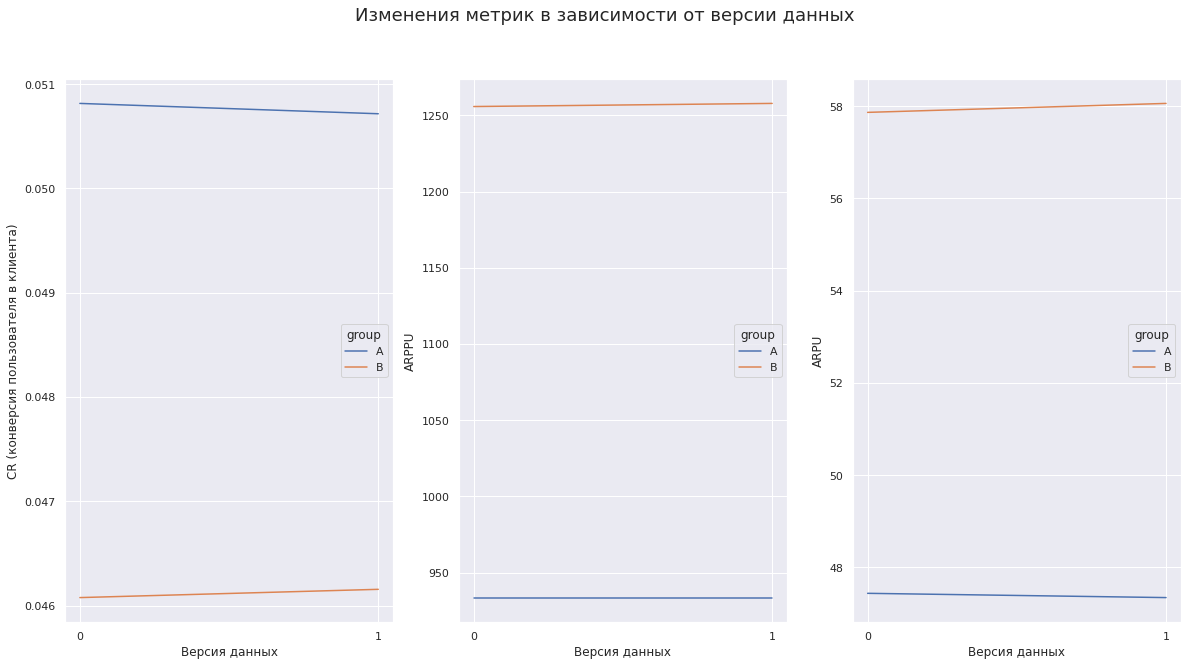

In [163]:
#при вызове функции получаем графики наших метрик отражающие их изменчивость из-за разных версий
add_charts()